In [2]:
import tensorflow as tf
import os

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#import zipfile

# Specify the path to the ZIP file
#zip_file_path = 'cat_dog_dataset.zip'

# Extract the ZIP file to the destination folder
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #zip_ref.extractall('cat_dog_dataset')

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
       'cat_dog_dataset/cat_dog_dataset/trainset',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 557 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
       'cat_dog_dataset/cat_dog_dataset/testset',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 140 images belonging to 2 classes.


In [8]:
cnn=tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation = 'relu',input_shape=[64,64,3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation = 'relu'))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
#flatten
cnn.add(tf.keras.layers.Flatten())

In [14]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128,activation = 'relu'))

In [15]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

In [16]:
#compile model
cnn.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [35]:
#train the model
history=cnn.fit(x=train_generator,validation_data =validation_generator,epochs=20)

Epoch 1/20
18/18 [==============================] - 22s 1s/step - loss: 0.6325 - accuracy: 0.6517 - val_loss: 0.6991 - val_accuracy: 0.5857
Epoch 2/20
18/18 [==============================] - 22s 1s/step - loss: 0.6131 - accuracy: 0.6535 - val_loss: 0.8243 - val_accuracy: 0.6000
Epoch 3/20
18/18 [==============================] - 22s 1s/step - loss: 0.5884 - accuracy: 0.7163 - val_loss: 0.6863 - val_accuracy: 0.6357
Epoch 4/20
18/18 [==============================] - 22s 1s/step - loss: 0.5749 - accuracy: 0.6876 - val_loss: 0.6794 - val_accuracy: 0.6143
Epoch 5/20
18/18 [==============================] - 31s 2s/step - loss: 0.5558 - accuracy: 0.7235 - val_loss: 0.7101 - val_accuracy: 0.6286
Epoch 6/20
18/18 [==============================] - 26s 1s/step - loss: 0.5419 - accuracy: 0.7235 - val_loss: 0.6982 - val_accuracy: 0.6000
Epoch 7/20
18/18 [==============================] - 24s 1s/step - loss: 0.4970 - accuracy: 0.7738 - val_loss: 0.7401 - val_accuracy: 0.5571
Epoch 8/20
18/18 [==

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
from PIL import Image
import numpy as np
from keras.preprocessing import image

# Load the image using PIL
test_image = Image.open("cat_dog_dataset/cat_dog_dataset/singleprediction/predict2.jpg")
test_image = test_image.resize((64, 64))  # Resize the image to the desired target size
test_image = np.array(test_image)  # Convert PIL image to NumPy array
test_image = np.expand_dims(test_image, axis=0)  # Add an extra dimension as the batch size
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] ==1:
    prediction ='dog'
else:
    prediction ='yes'


1/1 [==============================] - 0s 50ms/step


In [32]:
prediction

'dog'

In [34]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


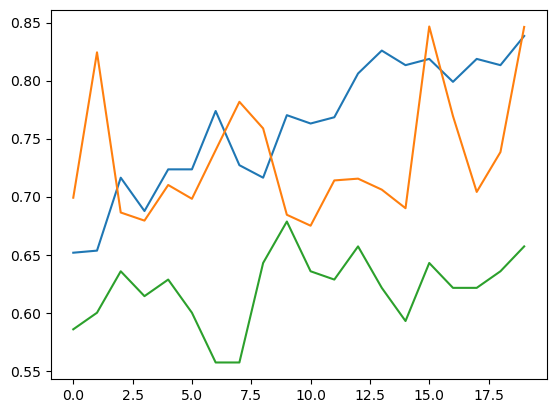

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])